# Simple Linear Regression

### 使用 pandas 的套件讀入 csv 資料檔

In [2]:
import pandas as pd

salary = pd.read_csv('../datasets/Salary_Data.csv')
salary.head() # show the first 5 rows

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### 使用 pandas 的 describe 針對讀進來的資料顯示詳細內容

In [4]:
import pandas as pd

salary = pd.read_csv('../datasets/Salary_Data.csv')
salary.describe() # show the summary statistics

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
import pandas as pd

salary = pd.read_csv('datasets/Salary_Data.csv')
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
import pandas as pd

salary = pd.read_csv('datasets/Salary_Data.csv')
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

/Users/yungchen/Documents/112-2學期/3_112-2_ML/Workspace/1122_MachineLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


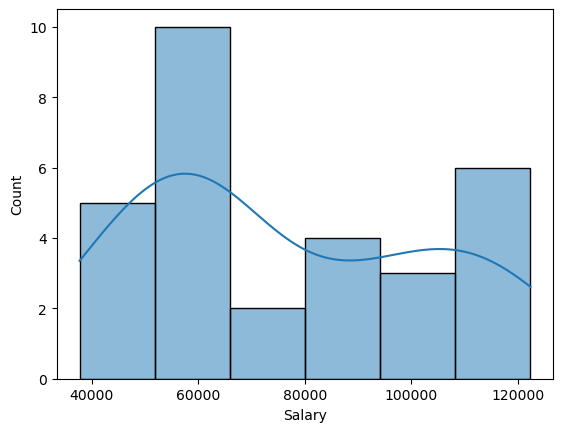

In [1]:
import pandas as pd
import seaborn as sns

salary = pd.read_csv('datasets/Salary_Data.csv')
sns.histplot(salary['Salary'], kde=True);

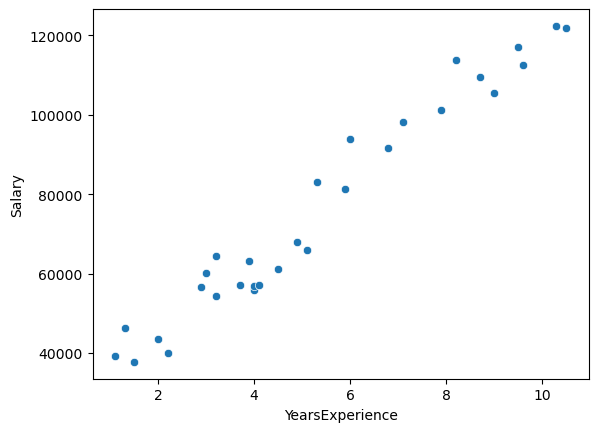

In [3]:
import pandas as pd
import seaborn as sns

salary = pd.read_csv('datasets/Salary_Data.csv')
sns.scatterplot(x='YearsExperience', y='Salary', data=salary);

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

salary = pd.read_csv('datasets/Salary_Data.csv')
X = salary['YearsExperience']
y = salary['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train.values)
train_score = lr.score(X_train.values.reshape(-1, 1), y_train.values)
test_score = lr.score(X_test.values.reshape(-1, 1), y_test.values)
print( f'Train score: {train_score}\nTest score: {test_score}' )

Train score: 0.9645401573418148
Test score: 0.9024461774180498


Train score: 0.9645401573418148
Test score: 0.9024461774180498


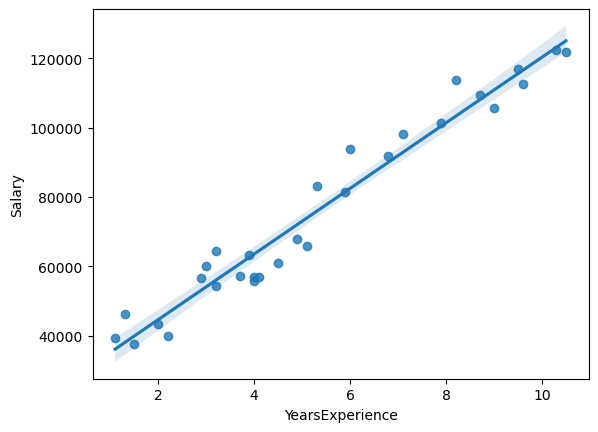

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

salary = pd.read_csv('datasets/Salary_Data.csv')
X = salary['YearsExperience']
y = salary['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train.values)
train_score = lr.score(X_train.values.reshape(-1, 1), y_train.values)
test_score = lr.score(X_test.values.reshape(-1, 1), y_test.values)
print( f'Train score: {train_score}\nTest score: {test_score}' )
sns.regplot(x='YearsExperience', y='Salary', data=salary);

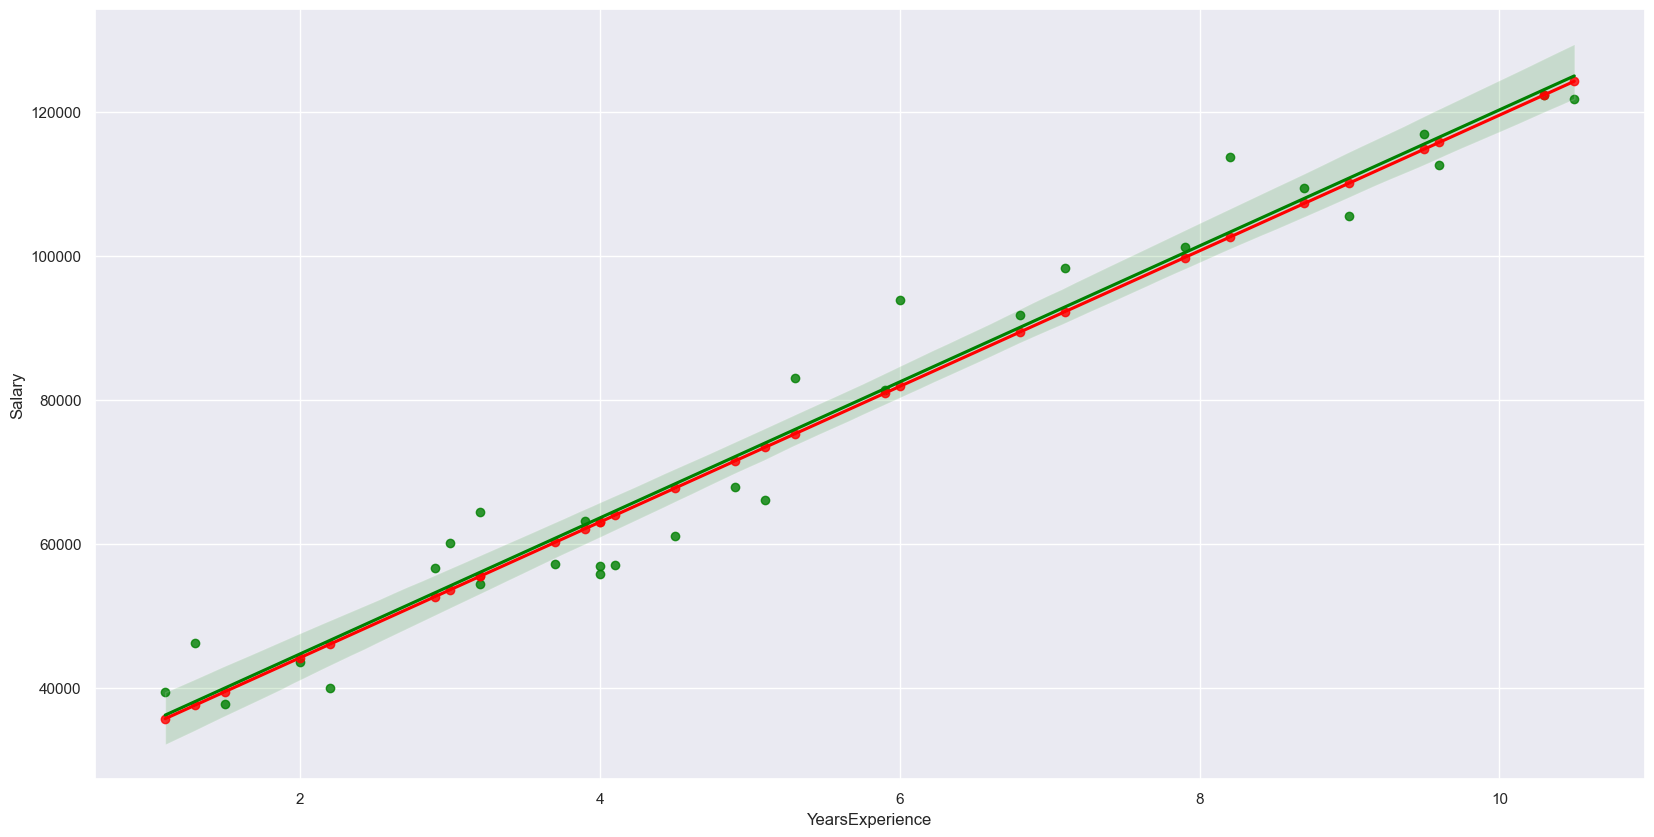

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

salary = pd.read_csv('datasets/Salary_Data.csv')
X = salary['YearsExperience']
y = salary['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train.values)
y_pred = lr.predict(X.values.reshape(-1, 1))
train_score = lr.score(X_train.values.reshape(-1, 1), y_train.values)
test_score = lr.score(X_test.values.reshape(-1, 1), y_test.values)
print( f'Train score: {train_score}\nTest score: {test_score}' )
sns.regplot(x='YearsExperience', y='Salary', data=salary, color='green');
sns.regplot(x=X, y=y_pred, data=salary, color='red');

Train score: 0.9645401573418148
Test score: 0.9024461774180498
Coefficient: 9423.815323030973
Intercept: 25321.583011776827


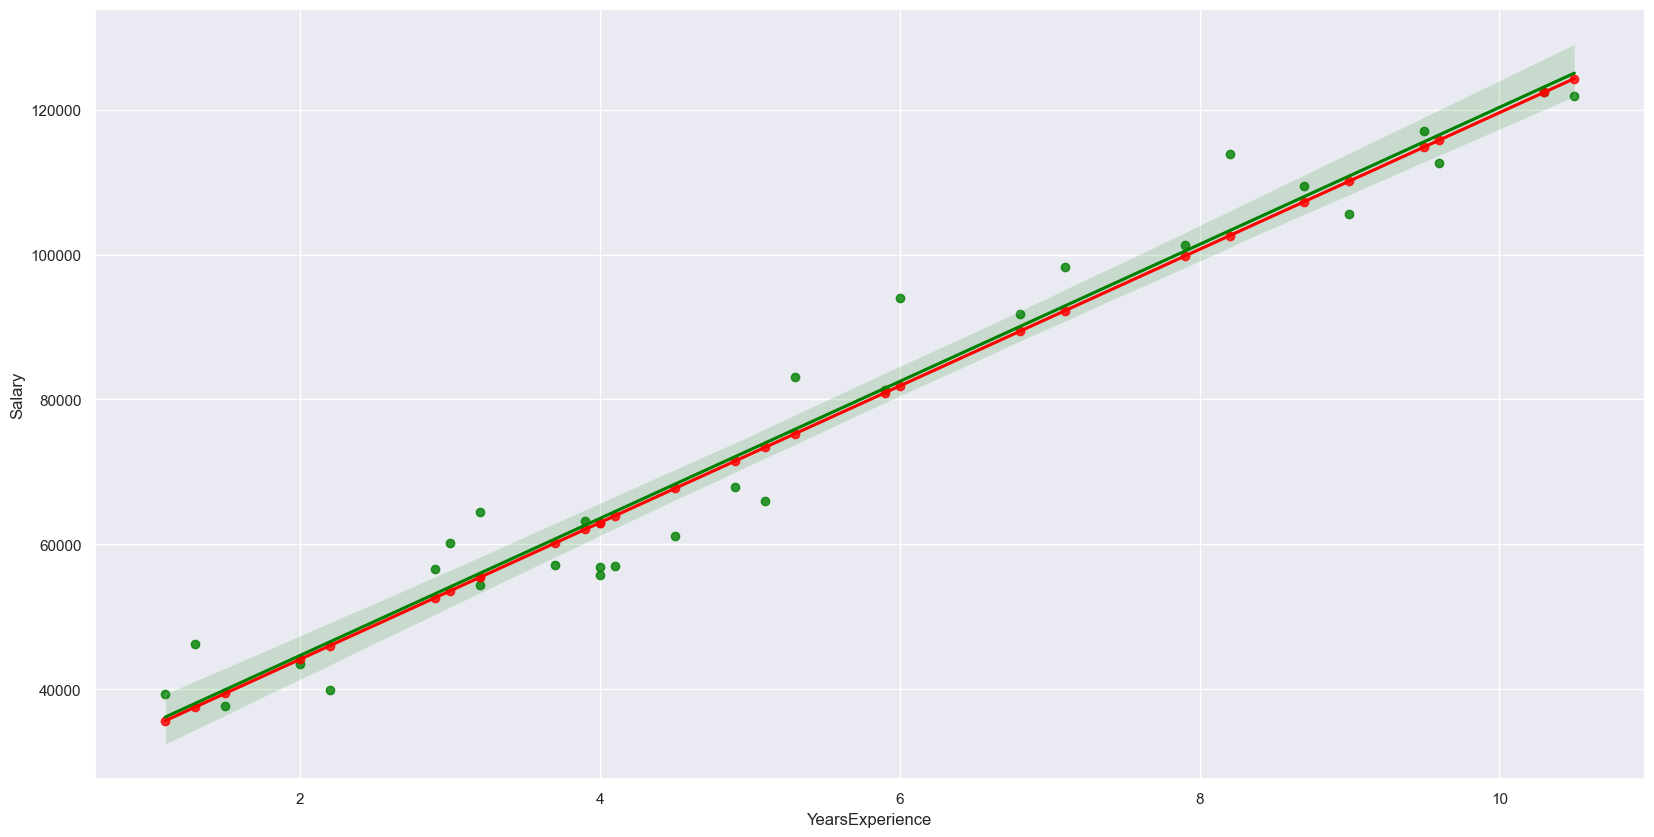

In [23]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

salary = pd.read_csv('datasets/Salary_Data.csv')
X = salary['YearsExperience']
y = salary['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train.values)
y_pred = lr.predict(X.values.reshape(-1, 1))
train_score = lr.score(X_train.values.reshape(-1, 1), y_train.values)
test_score = lr.score(X_test.values.reshape(-1, 1), y_test.values)
print( f'Train score: {train_score}\nTest score: {test_score}' )
sns.regplot(x='YearsExperience', y='Salary', data=salary, color='green');
sns.regplot(x=X, y=y_pred, data=salary, color='red');
print( f'Coefficient: {lr.coef_[0]}\nIntercept: {lr.intercept_}' )
pickle.dump(lr, open('models/salary_LR_model.pkl', 'wb'))

In [24]:
import pickle

load_LR_model = pickle.load(open('models/salary_LR_model.pkl', 'rb'))
test_YearsExperience = int(input('Enter years of experience: '))
print(f'Predicted salary: {load_LR_model.predict([[test_YearsExperience]])}')

Predicted salary: [91288.29027299]


# Outlier data 

In [1]:
import pandas as pd

adver = pd.read_csv('datasets/outlier_free_advertising_data.csv')
adver.head(), adver.describe(), adver.info(), adver.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         197 non-null    float64
 1   Radio      197 non-null    float64
 2   Newspaper  197 non-null    float64
 3   Sales      197 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


(      TV  Radio  Newspaper  Sales
 0  230.1   37.8       69.2   22.1
 1   44.5   39.3       45.1   10.4
 2   17.2   45.9       69.3   12.0
 3  151.5   41.3       58.5   16.5
 4  180.8   10.8       58.4   17.9,
                TV       Radio   Newspaper       Sales
 count  197.000000  197.000000  197.000000  197.000000
 mean   147.429442   23.047208   29.884264   15.168528
 std     85.020597   14.853229   20.442752    5.195438
 min      4.100000    0.000000    0.300000    3.200000
 25%     75.100000    9.900000   12.800000   11.000000
 50%    149.800000   22.300000   25.600000   16.000000
 75%    218.500000   35.800000   44.300000   19.000000
 max    293.600000   49.600000   89.400000   27.000000,
 None,
 TV           0
 Radio        0
 Newspaper    0
 Sales        0
 dtype: int64)

/Users/yungchen/Documents/112-2學期/3_112-2_ML/Workspace/1122_Machine_Learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yungchen/Documents/112-2學期/3_112-2_ML/Workspace/1122_Machine_Learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yungchen/Documents/112-2學期/3_112-2_ML/Workspace/1122_Machine_Learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


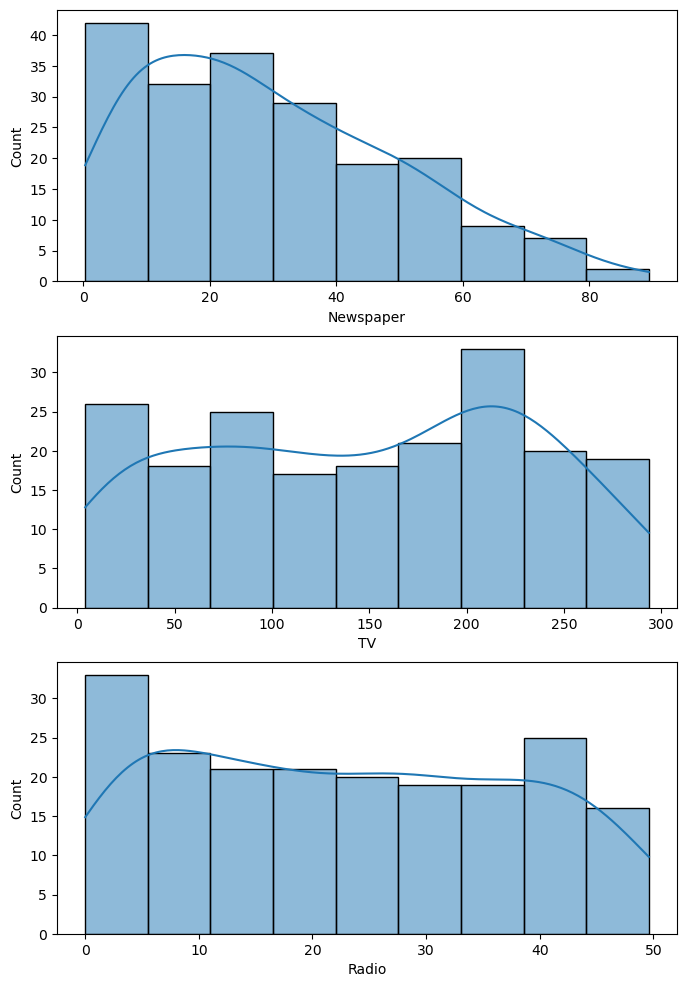

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

adver = pd.read_csv('datasets/outlier_free_advertising_data.csv')
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
sns.histplot(adver['Newspaper'], kde=True, ax=ax[0]);
sns.histplot(adver['TV'], kde=True, ax=ax[1]);
sns.histplot(adver['Radio'], kde=True, ax=ax[2]);

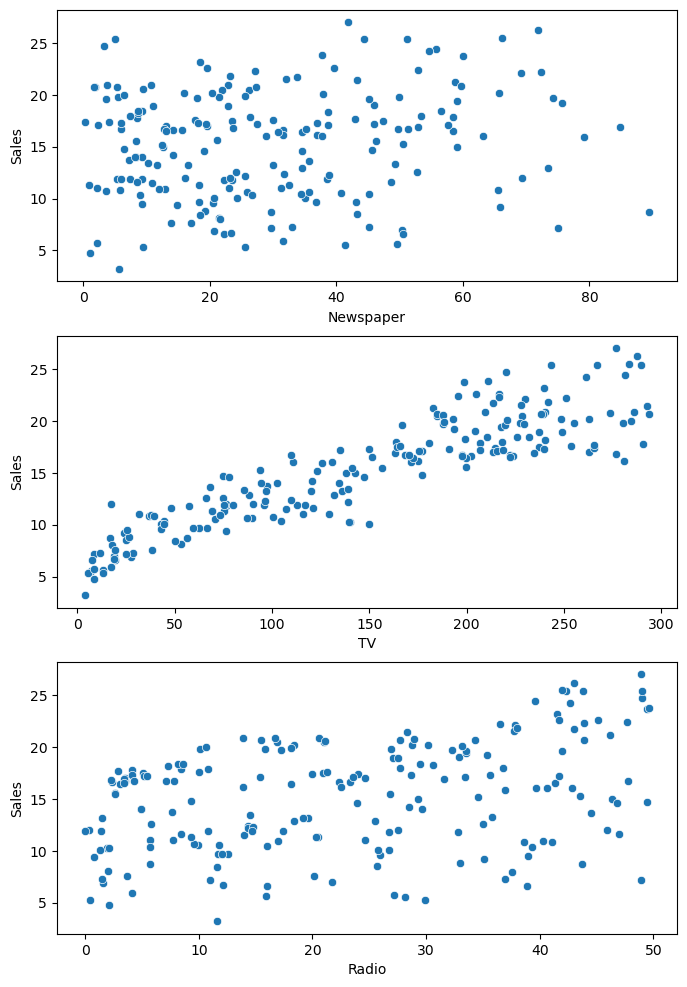

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

adver = pd.read_csv('datasets/outlier_free_advertising_data.csv')
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
sns.scatterplot(x=adver['Newspaper'], y=adver['Sales'], ax=ax[0]);
sns.scatterplot(x=adver['TV'], y=adver['Sales'], ax=ax[1]);
sns.scatterplot(x=adver['Radio'], y=adver['Sales'], ax=ax[2]);

Train score: 0.8214701003199214
Test score: 0.74347518882975


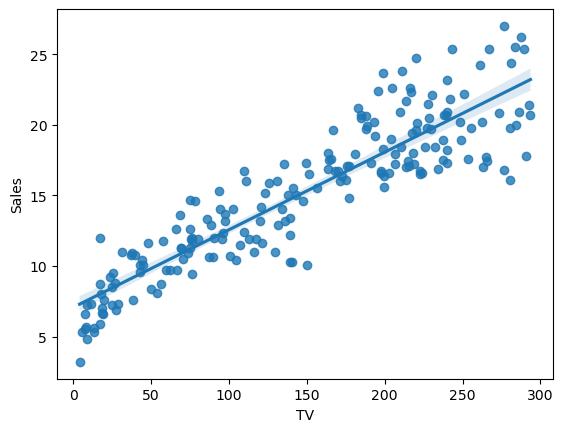

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

adver = pd.read_csv('datasets/outlier_free_advertising_data.csv')
X = adver['TV']
y = adver['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train.values)
train_score = lr.score(X_train.values.reshape(-1, 1), y_train.values)
test_score = lr.score(X_test.values.reshape(-1, 1), y_test.values)
print( f'Train score: {train_score}\nTest score: {test_score}' )
sns.regplot(x=adver['TV'], y=adver['Sales'], data=adver['TV']);

Train score: 0.8214701003199214
Test score: 0.74347518882975


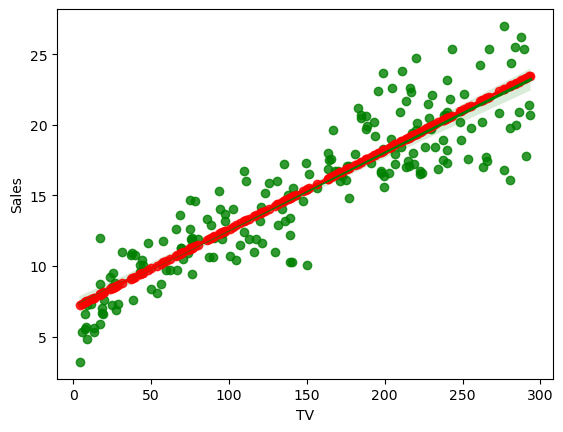

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


adver = pd.read_csv('datasets/outlier_free_advertising_data.csv')
X = adver['TV']
y = adver['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train.values)
train_score = lr.score(X_train.values.reshape(-1, 1), y_train.values)
test_score = lr.score(X_test.values.reshape(-1, 1), y_test.values)

y_pred = lr.predict(X.values.reshape(-1, 1))
train_score = lr.score(X_train.values.reshape(-1, 1), y_train.values)
test_score = lr.score(X_test.values.reshape(-1, 1), y_test.values)
print( f'Train score: {train_score}\nTest score: {test_score}' )
sns.regplot(x=adver['TV'], y=adver['Sales'], data=adver['TV'], color='green');
sns.regplot(x=X, y=y_pred, data=adver, color='red');